In [1]:
import os
import numpy as np
from plotly.subplots import make_subplots
from env.utils import load_all_scores, instance_fig

In [2]:
VRP_KEYS = ["ORTEC-n242-k12.vrp", "ORTEC-n323-k21.vrp", "ORTEC-n405-k18.vrp", "ORTEC-n455-k41.vrp", "ORTEC-n510-k23.vrp", "ORTEC-n701-k64.vrp", "Loggi-n401-k23.vrp", "Loggi-n501-k24.vrp", "Loggi-n601-k19.vrp", "Loggi-n601-k42.vrp", "Loggi-n901-k42.vrp", "Loggi-n1001-k31.vrp"]

In [3]:
print("IRL_HGS2 scores:")
irl_hgs_2_df = load_all_scores("logs/dataset_train_data_dimacs_HGS_0.1", range(1, 4), VRP_KEYS)
irl_hgs_2_best_score = irl_hgs_2_df.applymap(lambda x: min(x))
irl_hgs_2_overall = irl_hgs_2_best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
irl_hgs_2_overall.index = ["Min", "Max", "Mean", "Std."]
irl_hgs_2_overall.T.round(2)

IRL_HGS2 scores:


,Min,Max,Mean,Std.
ORTEC-n242-k12.vrp,123808.0,123832.0,123818.00,10.20
ORTEC-n323-k21.vrp,214125.0,215530.0,214769.00,579.52
ORTEC-n405-k18.vrp,200986.0,200986.0,200986.00,0.00
ORTEC-n455-k41.vrp,292516.0,292777.0,292690.00,123.04
ORTEC-n510-k23.vrp,184746.0,185367.0,185010.33,261.79
ORTEC-n701-k64.vrp,446537.0,446579.0,446551.67,19.34
Loggi-n401-k23.vrp,337206.0,337279.0,337244.33,29.91
Loggi-n501-k24.vrp,177078.0,177654.0,177270.00,271.53
Loggi-n601-k19.vrp,113225.0,113291.0,113250.33,29.04
Loggi-n601-k42.vrp,347082.0,347506.0,347241.67,188.26


In [4]:
print("IRL_VNS2 scores:")
irl_vns_2_df = load_all_scores("logs/dataset_train_data_dimacs_VNS_0.1", range(1, 4), VRP_KEYS)
irl_vns_2_best_score = irl_vns_2_df.applymap(lambda x: min(x))
irl_vns_2_overall = irl_vns_2_best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
irl_vns_2_overall.index = ["Min", "Max", "Mean", "Std."]
irl_vns_2_overall.T.round(2)

IRL_VNS2 scores:


,Min,Max,Mean,Std.
ORTEC-n242-k12.vrp,124456.0,125094.0,124840.67,276.52
ORTEC-n323-k21.vrp,215394.0,216799.0,215964.67,603.13
ORTEC-n405-k18.vrp,202962.0,203972.0,203313.00,466.31
ORTEC-n455-k41.vrp,294470.0,296018.0,295205.00,634.37
ORTEC-n510-k23.vrp,185507.0,185817.0,185640.33,130.21
ORTEC-n701-k64.vrp,450240.0,453172.0,452119.00,1331.88
Loggi-n401-k23.vrp,337497.0,340702.0,338657.00,1450.39
Loggi-n501-k24.vrp,178067.0,178824.0,178380.00,322.63
Loggi-n601-k19.vrp,113707.0,114285.0,113943.67,247.30
Loggi-n601-k42.vrp,349414.0,352205.0,350729.33,1145.05


In [5]:
def show_graphs(algo, lamb, best_scores, key_str="E-"):
    names = [x for x in VRP_KEYS if key_str in x]
    n = len(names)
    fig = make_subplots(rows=1, cols=n, horizontal_spacing=0.01)
    os.makedirs(f"graphs/dataset_train_data_dimacs_{algo}_{lamb}", exist_ok=True)
    for i, key in enumerate(names):
        plotly_fig, score = instance_fig(best_scores, key, "dataset/train/data_dimacs")
        plotly_fig.write_image(f"graphs/dataset_train_data_dimacs_{algo}_{lamb}/{key}.pdf")
        title = key.split(".")[0] + f" - {score:.1f}"
        fig.add_traces(plotly_fig.data, rows=i//n+1, cols=i%n+1)
        fig['layout'][f'xaxis{i+1}'].update(title=title)
    fig.update_layout(height=200*2, width=180*2*n)
    fig.update_traces(line_width=1, marker_size=2)
    fig.update_layout(template='plotly_white', margin=dict(l=4, r=4, t=4, b=4, pad=4, autoexpand=True))
    fig.update_xaxes(showgrid=False, showticklabels=False, showline=False, zeroline=False)
    fig.update_yaxes(visible=False)
    fig.update_layout(showlegend=False)
    fig.show("svg")

ORTEC instances:
IRL_HGS2


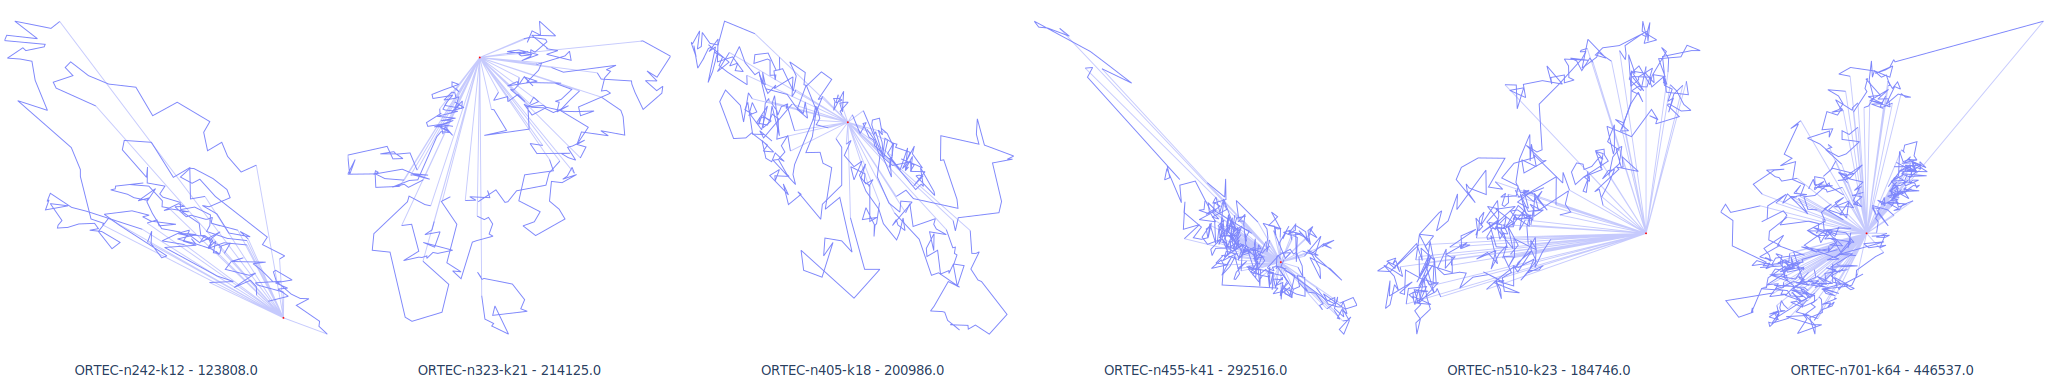

IRL_VNS2


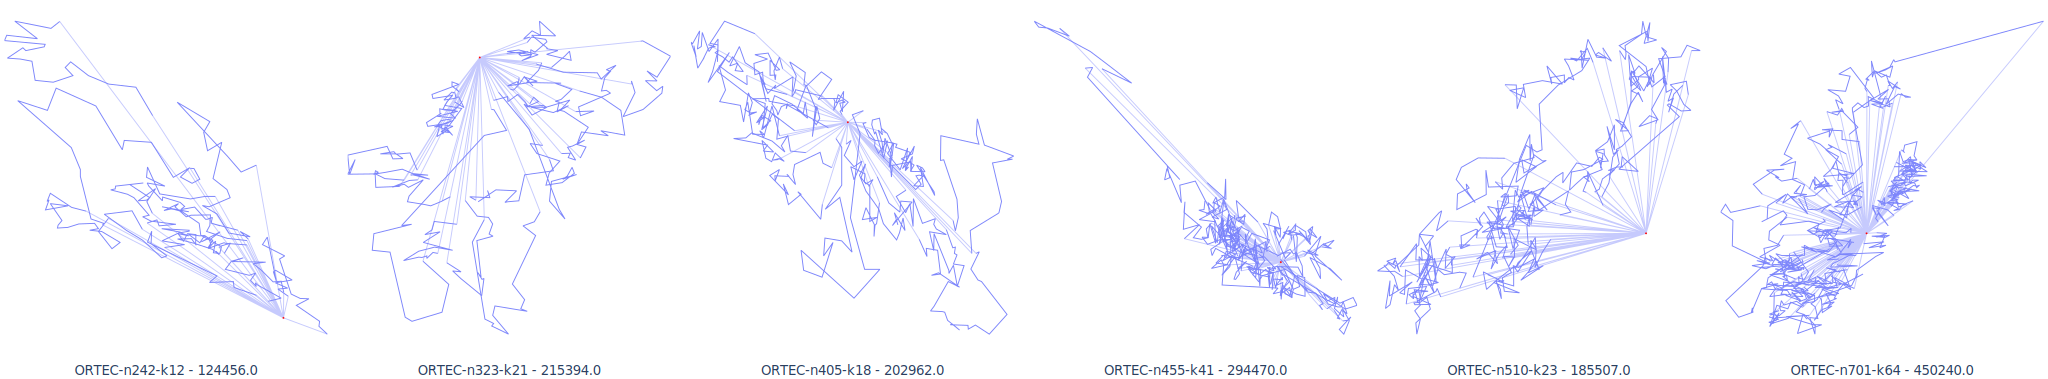

In [6]:
print("ORTEC instances:")
print("IRL_HGS2")
show_graphs("HGS", 0.1, irl_hgs_2_best_score, "ORTEC")
print("IRL_VNS2")
show_graphs("VNS", 0.1, irl_vns_2_best_score, "ORTEC")

Loggi instances:
IRL_HGS2


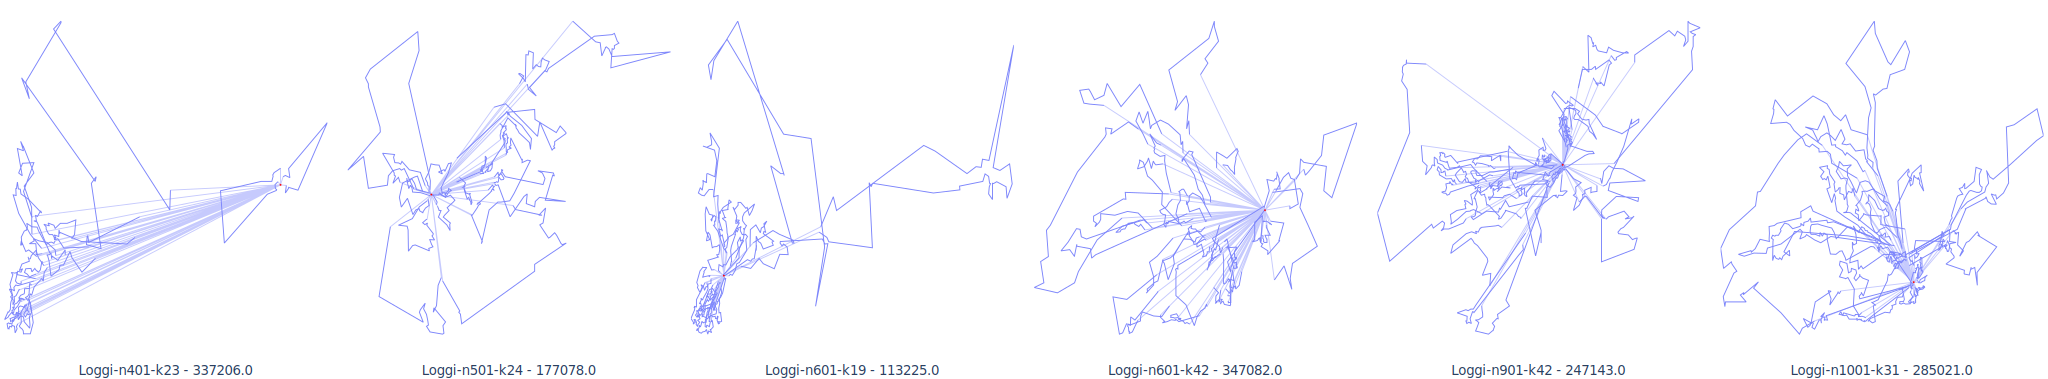

IRL_VNS2


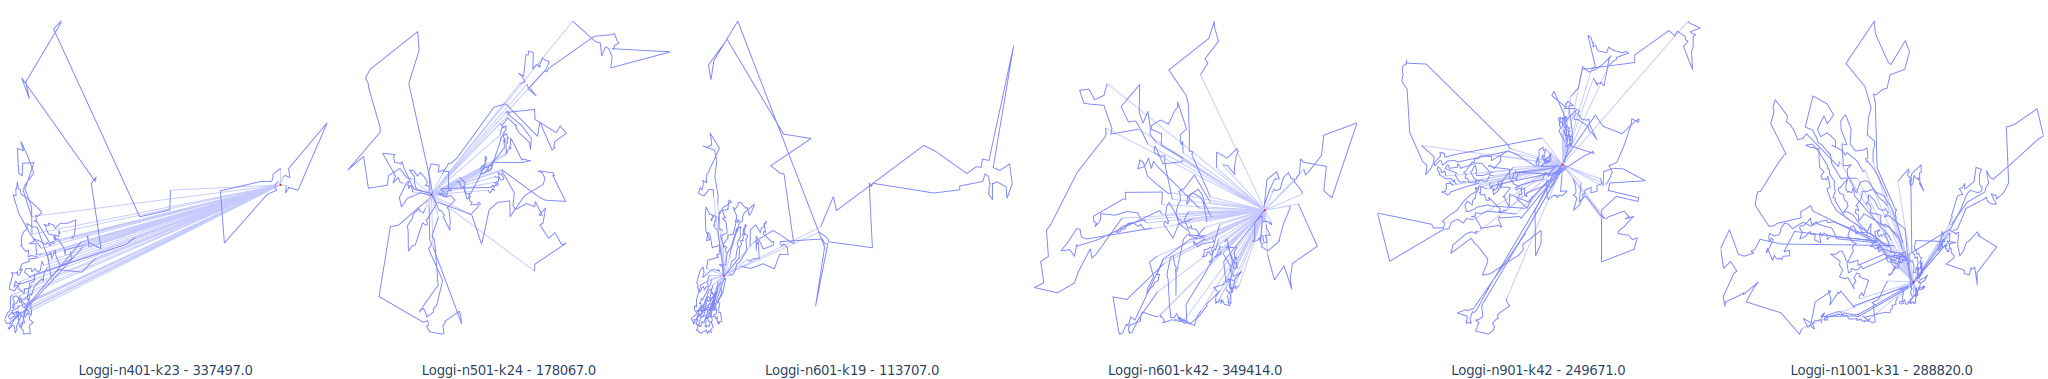

In [7]:
print("Loggi instances:")
print("IRL_HGS2")
show_graphs("HGS", 0.1, irl_hgs_2_best_score, "Loggi")
print("IRL_VNS2")
show_graphs("VNS", 0.1, irl_vns_2_best_score, "Loggi")